<a href="https://colab.research.google.com/github/thecrazyphysicist369/Amnesic-Flooding/blob/main/Amnesiac_Flooding_Multiple_Strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Amnesic Flooding
##

In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd

#Preparing the Model and Functions

##Creating individuals

Each node represent one individual(person).
Generating nodes with their distinct properties.The attributes of each node are:


1. Distinct identification number (index)
2. Set of neighbouring nodes  
3. Memory storing set of messages generated/recieved 
4. A node may or may not be generator
5. The generator nodes will store the message they created 
6. Storing the messages recieved in the current round


In [ ]:
'''
vertex generator generates each individual with their properties
'''

def gen_vertex(n,percent):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of th individual
                'connected': [] ,  # the small world connections between the individuals
                'memory': [],     #stores informtion generated (in case of message generting nodes) and information received 
                'generator' : random.randint(0,percent) ,    #the node may be generator 
                'mymsg':'0',     #if generator, then the messages generated by those nodes will be listed
                'cur_msg':[]     #storing messages received in the current iteration
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

##Generating the Population
####A WS-Small world network is created with user input of:


*   **n** = *Number of individuals in the population. This is similar to the number of nodes in the small world network*.
*   **k** = *Number of nearest-neighbours. The number of nodes connected to each node in the small world network.*
*   **p** = *Probability of the length of connection between the nodes of the small world network.*

As in a social media network, every individual doesn't create content but forward content received from other individuals. The number of creators are a percent of the population. This is why we included percent as a parameter in the small world.


*   **percent** = *The percent of the total population which generates new information*


In [ ]:
'''
Generating the Small World Network
'''

def gen_graph(n, k, p,percent):
   population = gen_vertex(n,percent)   #list of nodes in the small world network
   G = nx.watts_strogatz_graph(n, k, p, seed=10)    #connecting the  nodes with the defined parameters 
   neighbor = []    #empty list 
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))     #using WS network the network is formed
   	neighbor.append(neighbours)       # we have the list of neighbours among whom the nodes share messages 
   for i in range(n): #*
     population[i]['connected'] = neighbor[i] 
     population[i]['index'] = int(i) 
     population[i]['node_sharability'] = random.randint(0,k) 
   return population

##Creating the  information pool
The message generating nodes will choose messages from this information pool

In [ ]:
'''

This function generates and returns a list of msgs of strings. 
It takes different characters as input and form different combinations.
Each distinct combination represent a distinct message .

'''

def msgList():
  list1=[]
  for i in range(60,123) :
    for j in range(60,123) :
      p=chr(i)+chr(j)  # creating comnbinations  
      list1.append(p)  #generating the list
  return list1


##Message Generation
The message generation function selects nodes from the population. If the node is a generator node then the function helps the node to generate unique messages from the message list.

*   **Population** = *The vertex list returned by the gen_graph() function.*

The fucntion returns a dictionary of all the generator nodes.

In [ ]:
'''
this function randomly chooses from the list of msg and assigns it to one of the nodes that are generators 
'''
def  msgGeneration(population):
  dict={}
  list1=msgList()
  for i in population:
    if(i['generator']==1 ):   # if in message generation a node has generator attribute as 1 ,then it is considered as generator
      l=random.randint(0,len(list1)-1)     # generator choosing a message from the informtaion pool randomly
      dict[list1[l]]=0  
      i['mymsg']=list1[l]   #the generators will have the message or messsages generated by them
      list1.pop(l)    # deleting the chosen information from the information pool to maintain uniqueness of the messages 
  #print(len(list1))
  return dict


#population



In [ ]:
def plotXY(x,y,x_name,y_name):
  plt.figure(figsize=(10,6))
  plt.plot(x, y)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  
  plt.show()

##Message Passing or Hop
* Message passing from the perspective of the nodes

* Hops from the perspective of the messages

It defines the message being sent or transfered from one node to another.



In [ ]:
def msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,node):
  total=0
  for adj in node['connected']:
    deliver=random.randint(0,1)
   # deliver=1
    if(deliver==1):
      if(msg in population[adj]['memory']):
        continue
      else:
        if(len(population[adj]['memory'])>=k):
          population[adj]['memory'].pop(0)
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          total+=1
        else:
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          total+=1
    else:
      continue
  
  return total

#Outcomes
Here we run different algorithms to figure out the insights of amnesic flooding in the network.

##Total Hops vs Iteration
###The Function

In [ ]:
def avgHopsCalc1(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  total=0
  for node in population:
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
  iteration=0
  while(iteration<=iter):
    for node in population:
      for msg in node['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,node) 
        #print(total)

    x.append(iteration)
    y.append(total)            

    iteration+=1
    #total=0
  plotXY(x,y,"iteration","total hops") 
  return (total) 


In [ ]:
def user_input(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  memory=[]
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("No of generators= ",g)
  avgHopsCalc1(population,mem,dict,iter)
#population


###Results

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  30
Total iterations=  100
No of generators=  57


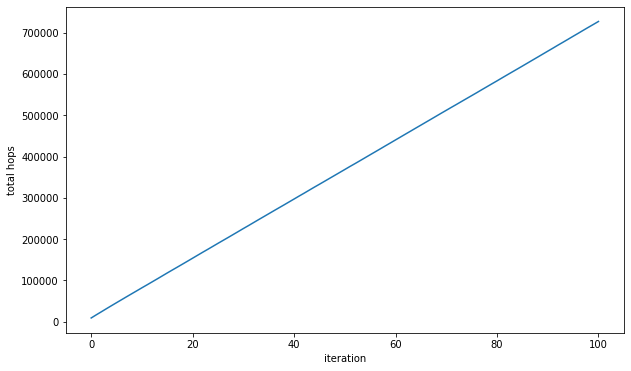

In [ ]:
user_input(200,30,0.5,3,100,30) ## memory(30) < msgs(57)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  70
Total iterations=  100
No of generators=  55


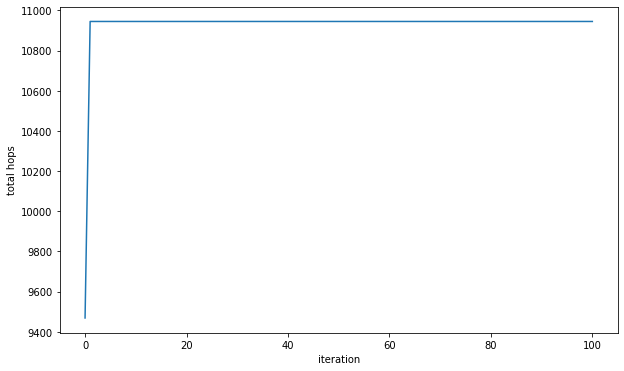

In [ ]:
user_input(200,30,0.5,3,100,70) ## memory(70) > msgs(55)

No of nodes=  200
Nearest neighbours=  30
Probability  0.9
Size of memory=  70
Total iterations=  100
No of generators=  54


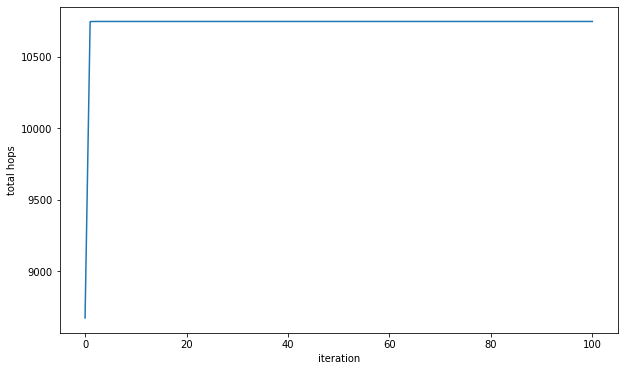

In [ ]:
user_input(200,30,0.9,3,100,70) ## memory(70) > msgs(55)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  8
Total iterations=  100
No of generators=  46


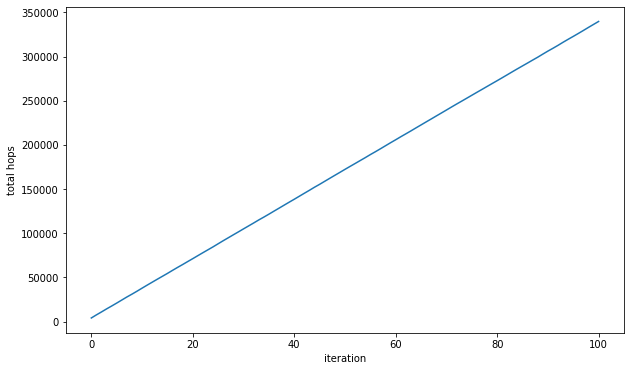

In [ ]:
user_input(200,30,0.5,3,100,8) ## memory(8) < msgs(46)

#Avg hops per iteration( only the current iteration's average hops)


In [ ]:
def avgHopsCalc2(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  total=0
  for node in population:
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
  iteration=0
  while(iteration<=iter):
    for node in population:
      for msg in node['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,node) 
        #print(total)

    x.append(iteration)
    y.append(total)            

    iteration+=1
    total=0
  plotXY(x,y,"Iteration","average_hops") 
  return (total) 


In [ ]:
def user_input2(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # memory=[]
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("No of generators= ",g)
  avgHopsCalc2(population,mem,dict,iter)
#population


#Observations(Avg hops per iteration)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  30
Total iterations=  100
No of generators=  55


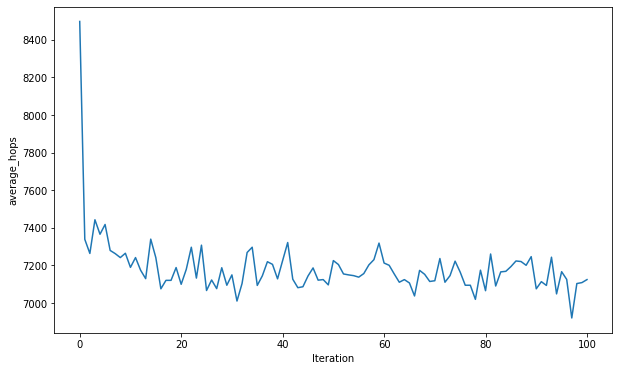

In [ ]:
user_input2(200,30,0.5,3,100,30) ## memory(30) < msgs(55)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  70
Total iterations=  100
No of generators=  62


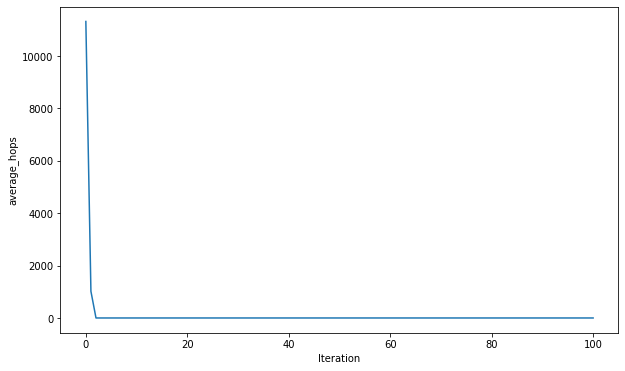

In [ ]:
user_input2(200,30,0.5,3,100,70) ## memory(70) > msgs(62) as expected first it will go very high then steeply come down to 0.

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  10
Total iterations=  100
No of generators=  102


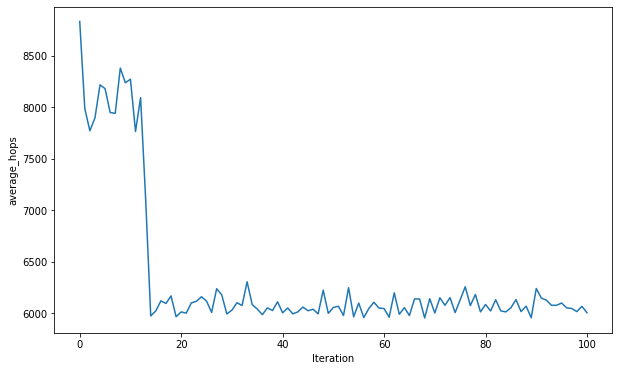

In [ ]:
user_input2(200,30,0.5,1,100,10) ##memory(10)<<msgs(102)

No of nodes=  1000
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  100
No of generators=  322


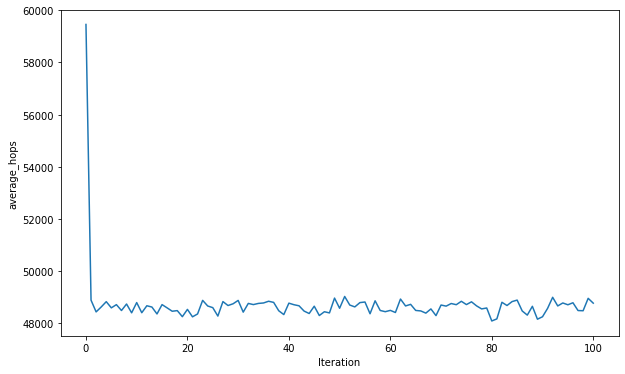

In [ ]:
user_input2(1000,30,0.5,2,100,20) ##memory(20)<<msgs(322)

No of nodes=  1000
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  600
No of generators=  344


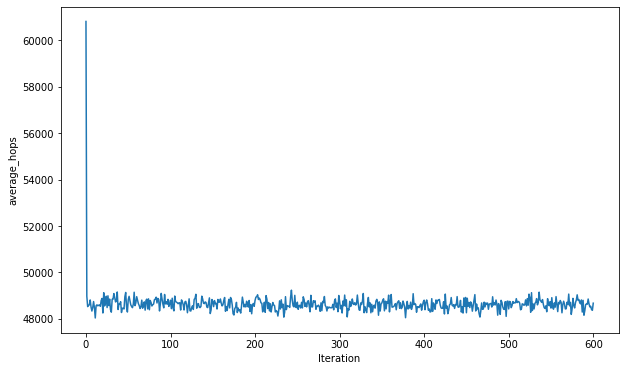

In [ ]:
user_input2(1000,30,0.5,2,600,20) ##memory(20)<<msgs(344)

#Total Hops vs memory
##Fucntion
**Description** in english
**PseudoCode** 
$hello$

In [ ]:
def avgHopsCalc3(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  total=0
  for node in population:
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
  iteration=0
  while(iteration<=iter):
    for node in population:
      for msg in node['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,node) 
        #print(total)

    #x.append(iteration)
    #y.append(total)            

    iteration+=1
    #total=0
  #plotXY(x,y,"memory given","total hops") 
  return (total) 


In [ ]:
def user_input3(no_nodes,no_of_connected_components,p,percent,iter):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Total iterations= ",iter)
  avg=[]
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("Total no of msgs",g)
  for j in (g-(g//2),5*g):  ## looping for all results from g/2 to 5*g
    memory.append(j)
    for node in population:
      node['memory']=[]   ## After each memory length given we reset all the memory in population to blank.
      if(node['generator']==1):
        node['memory'].append(node['mymsg'])
    avg.append(avgHopsCalc3(population,j,dict,iter))
  plotXY(memory,avg,"Memory given","total Hops after all iter")
 # plt.plot(memory,avg )
 # plt.xlabel("memory given")
  #plt.ylabel("avg_hops")
  #plt.show()
#population


##Observation


#Observations(MEMORY GIVEN VS TOTAL HOPS)

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Total iterations=  10
Total no of msgs 25


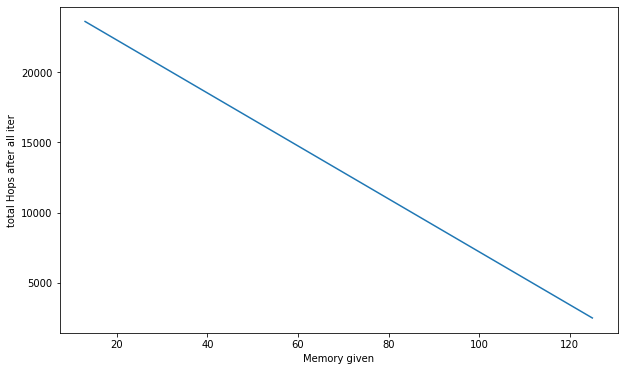

In [ ]:
user_input3(100,20,0.5,3,10) ## total no of msgs=25

No of nodes=  100
Nearest neighbours=  50
Probability  0.5
Total iterations=  10
Total no of msgs 24


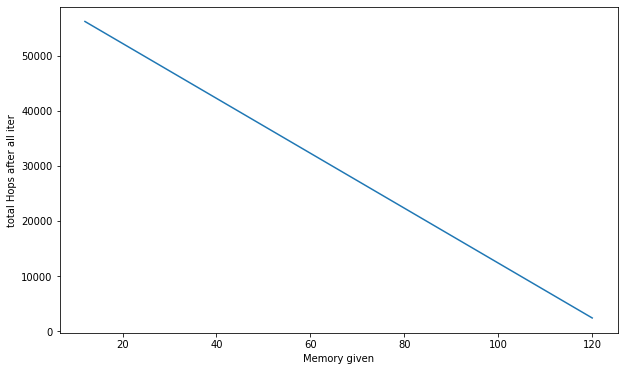

In [ ]:
user_input3(100,50,0.5,3,10) ##nearest neighbour increased from 10 to 50.Thus the total hops increases

No of nodes=  500
Nearest neighbours=  50
Probability  0.5
Total iterations=  10
Total no of msgs 124


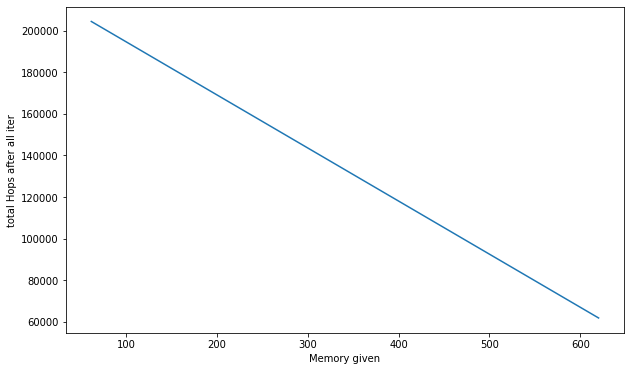

In [ ]:
user_input3(500,50,0.5,3,10) ##no of nodes increased fromm 100 to 500 and also msg increases to 124

#Rounds vs Avg_hops per round

In [ ]:
def avgHopsCalc4(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  rounds=0
  total=0
  for node in population:
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
  iteration=0
  while(iteration<=iter):
    for node in population:
      for msg in node['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,node) 
        #print(total)
      rounds+=1
      #if(rounds%100)==0:
      if(rounds%100):
        x.append(rounds)
        y.append(total)
      total=0
                

    iteration+=1
    total=0
  plotXY(x,y,"total rounds","average hops in each rounds") 
  return (total/g) 

In [ ]:
def user_input4(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of generator",g)
  avgHopsCalc4(population,mem,dict,iter)
#population


#OBSERVATIONS(ROUNDS VS AVG_HOPS PER ROUND)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  30
Total iterations=  10
no of generator 48


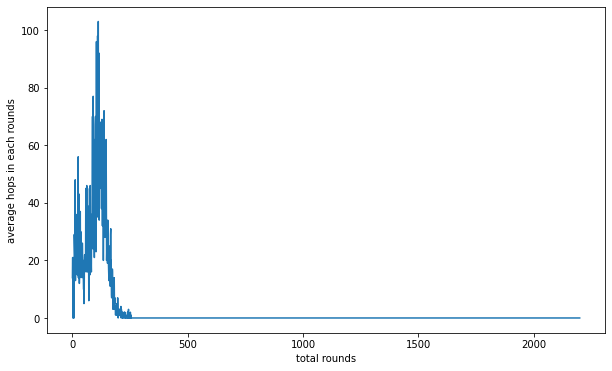

In [ ]:
user_input4(200,30,0.5,3,10,30) ## memory(30) < msgs(48)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  10
no of generator 44


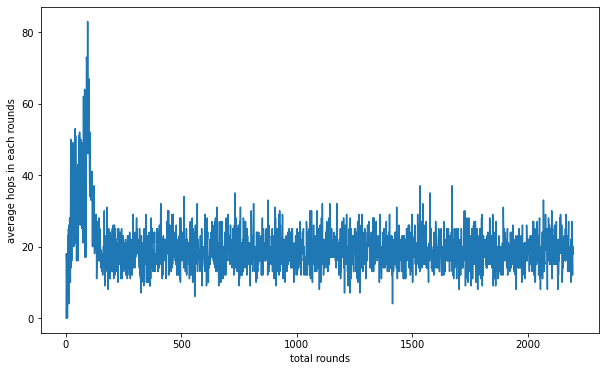

In [ ]:
user_input4(200,30,0.5,3,10,20) ## memory(20) < msgs(44)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  10
Total iterations=  10
no of generator 95


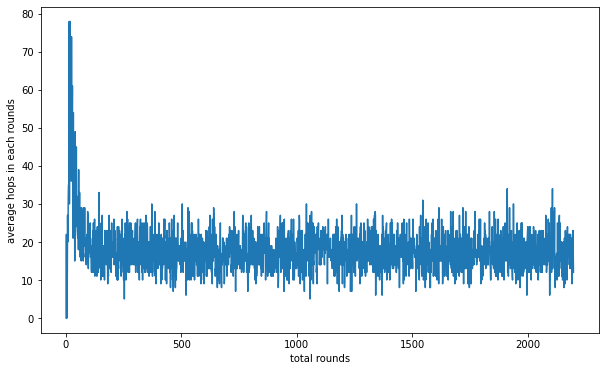

In [ ]:
user_input4(200,30,0.5,1,10,10) ## memory(10) << msgs(95)

No of nodes=  400
Nearest neighbours=  30
Probability  0.5
Size of memory=  10
Total iterations=  10
no of generator 187


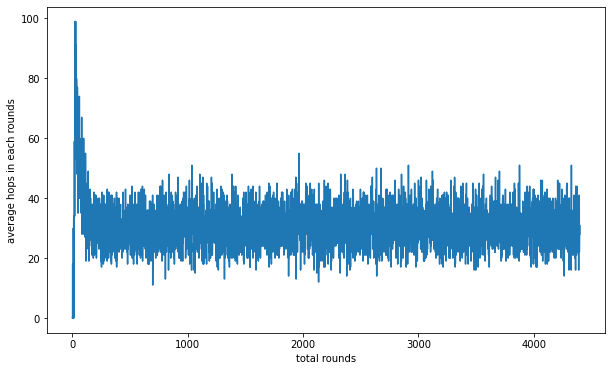

In [ ]:
user_input4(400,30,0.5,1,10,10) ## memory(10) << msgs(95)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  110
Total iterations=  10
no of generator 105


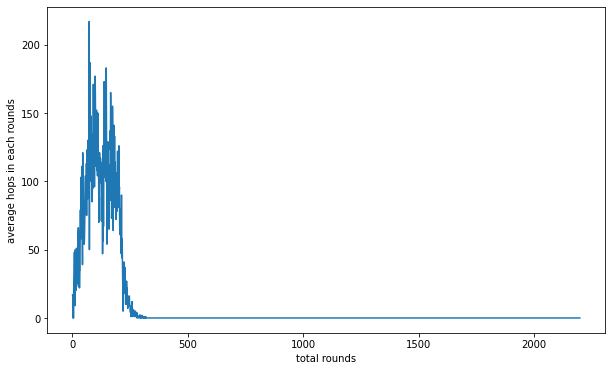

In [ ]:
user_input4(200,30,0.5,1,10,110) ## memory(110) >> msgs(105)

#Iterations vs avg hops per message


In [ ]:
def msg_Delivery_to_Adjacent_Nodes5(msg,population,k,dict,node,iteration):
  total=0
  for adj in node['connected']:
    #deliver=random.randint(0,1)
    deliver=1
    if(deliver==1):
      if(msg in population[adj]['memory']):
        continue
      else:
        if(len(population[adj]['memory'])>=k):
          population[adj]['memory'].pop(0)
          population[adj]['memory'].append(msg)
          dict[msg][iteration]+=1
         # print(msg," ",dict[msg])
          total+=1
        else:
          population[adj]['memory'].append(msg)
          dict[msg][iteration]+=1
          total+=1
    else:
      continue
  
  return total

In [ ]:
def iter_VS_Avg_hops5(dict,iter):
  k=0
  x=[]
  y=[]
  for msg in dict:
    if(k>=6):
      break
    for i in range(0,iter):
      x.append(i)
      y.append(dict[msg][i])
    k+=1


    plt.figure(figsize=(10,6))
    plt.plot(x, y)
    
    plt.xlabel("iter")
    plt.ylabel("avg_hops")
  
    plt.show()
    print(msg)
    x=[]
    y=[]

In [ ]:
def avgHopsCalc5(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  rounds=0
  total=0
  iteration=0
  for node in population:
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      for i in range (0,iter):
        dict[node['mymsg']].append(0)
  while(iteration<=iter):
    for node in population:
      for msg in node['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes5(msg,population,k,dict,node,iteration) 
        #print(total)
      rounds+=1
      #if(rounds%100)==0:
     # x.append(rounds)
      #y.append(total)
      total=0
                

    iteration+=1
    if(iteration==2):
     print(iteration)
    total=0
  iter_VS_Avg_hops5(dict,iter)
   
  return dict 

def user_input5(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  dict=msgGeneration(population)
  for node in population:
    if(node['generator']==1):
      g=g+1
      dict[node['mymsg']]=[]
      for i in range(0,iter):
        dict[node['mymsg']].append(0)
        #print(dict[node['mymsg']][i])
  
      
  
  #for item in dict:
  print("No of msgs= ",g)
  avgHopsCalc5(population,mem,dict,iter)
#population


#OBSERVATIONS(PER MSG HOPS WITH ITERATION)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  30
Total iterations=  100
No of msgs=  51
2


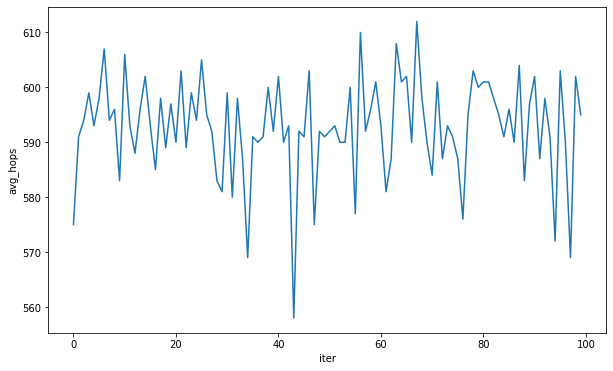

KJ


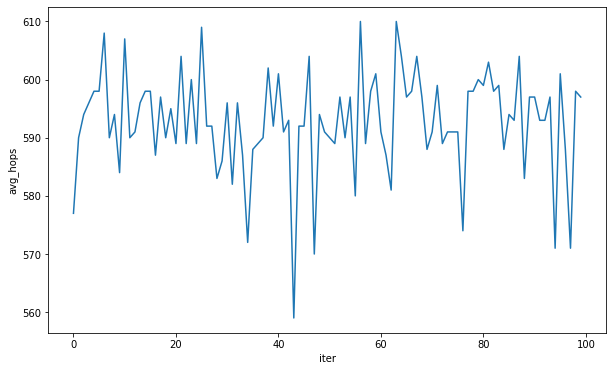

Xr


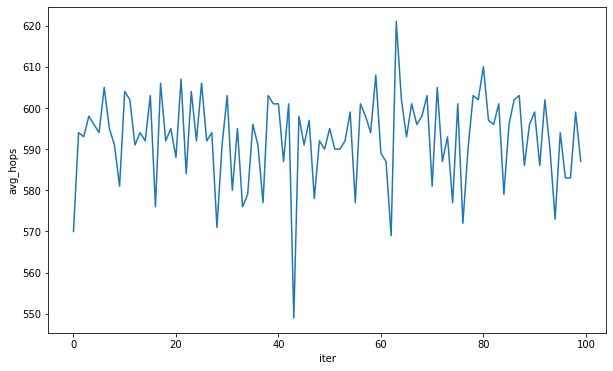

Vd


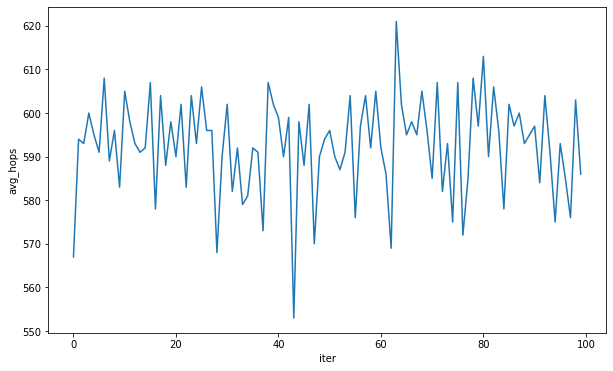

^`


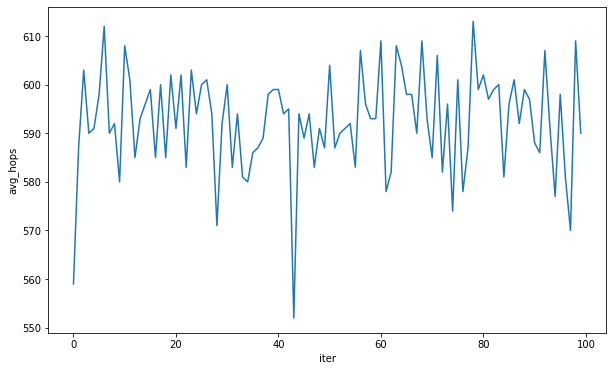

q_


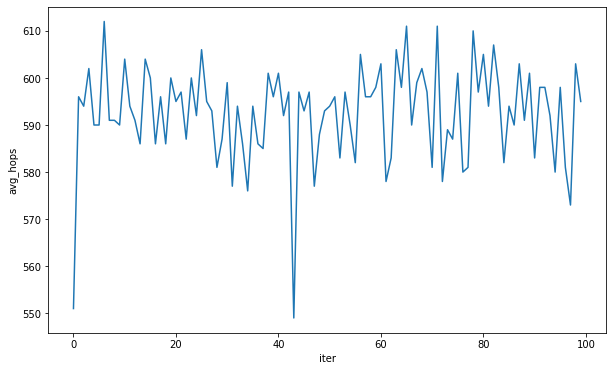

p@


In [ ]:
user_input5(200,30,0.5,3,100,30) ## memory(30) < msgs(51)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  100
No of msgs=  50
2


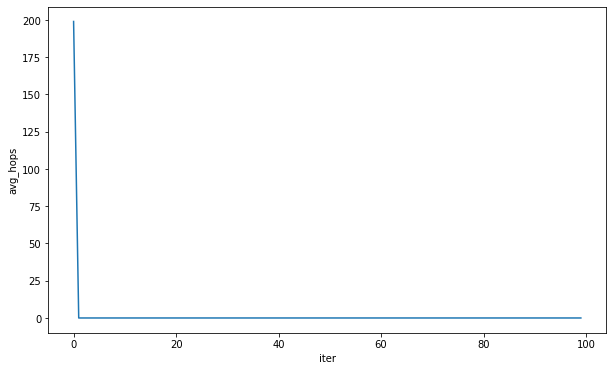

Gp


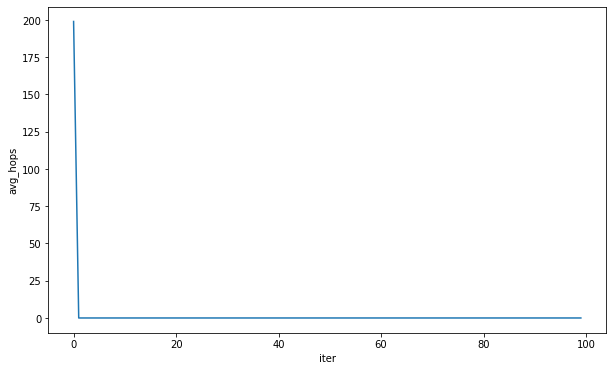

Y\


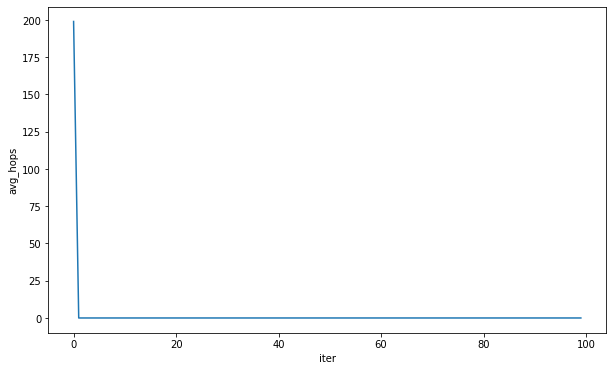

Qj


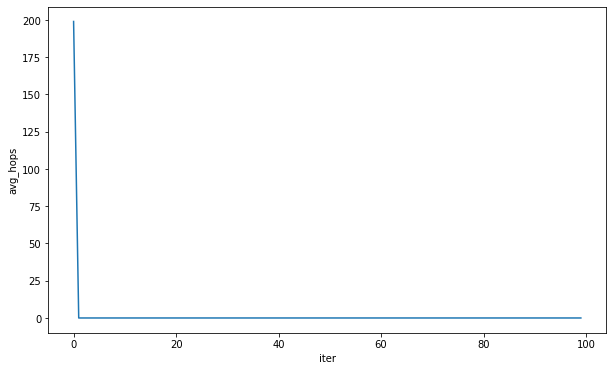

>A


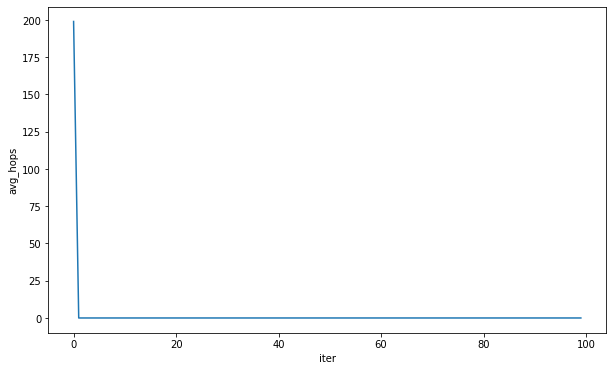

Ml


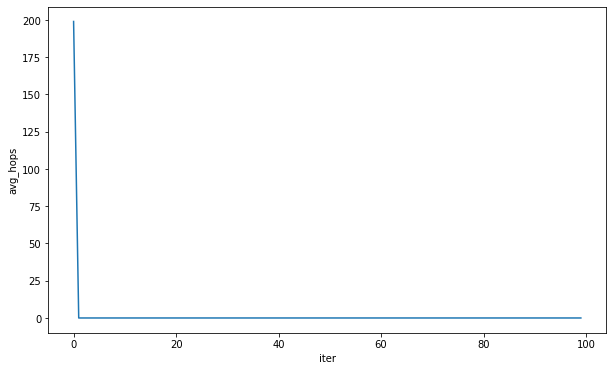

=V


In [ ]:
user_input5(200,30,0.5,3,100,20) ## memory(20) < msgs(50)

No of nodes=  500
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  100
No of msgs=  152
2


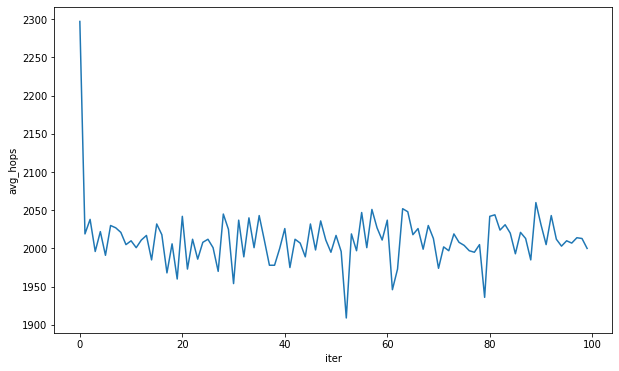

bV


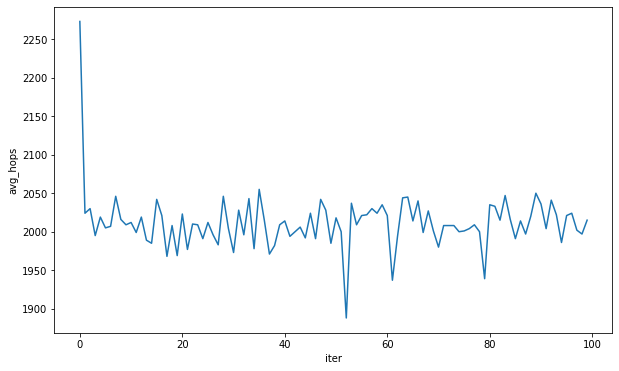

st


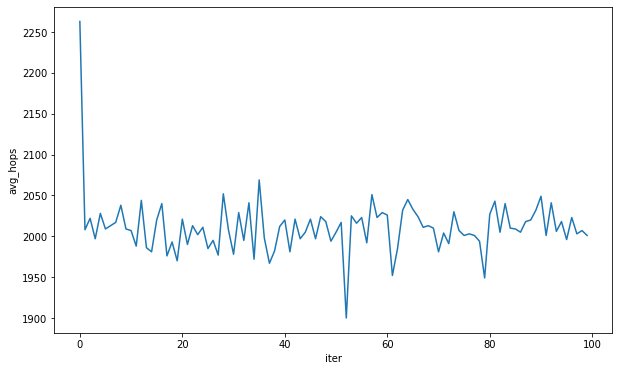

qu


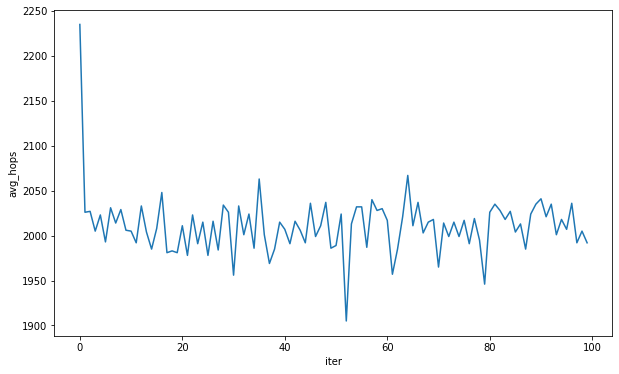

bb


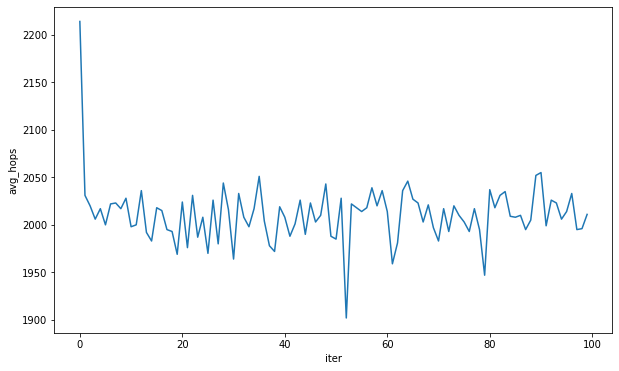

gE


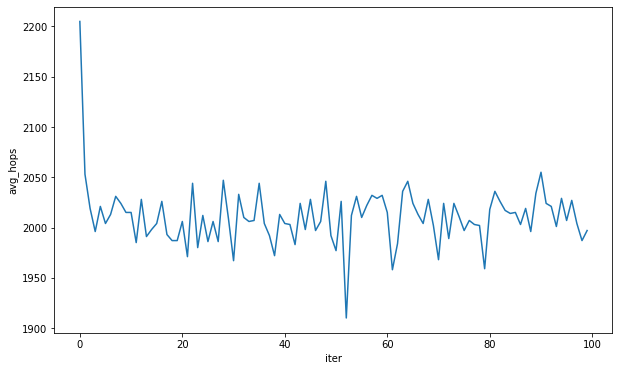

fv


In [ ]:
user_input5(500,30,0.5,2,100,20) ## memory(20) << msgs(152)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  100
Total iterations=  100
No of msgs=  49
2


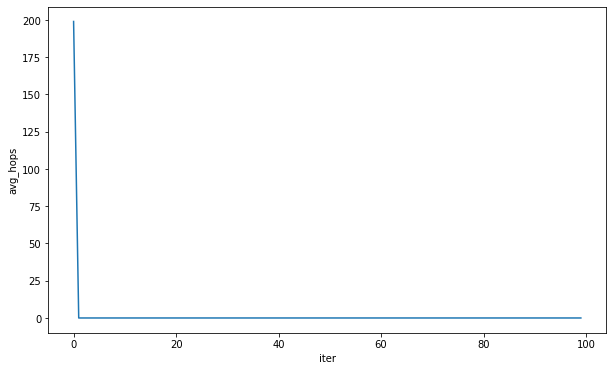

<t


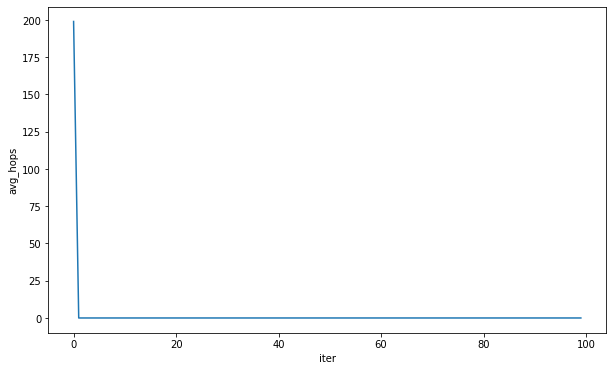

?s


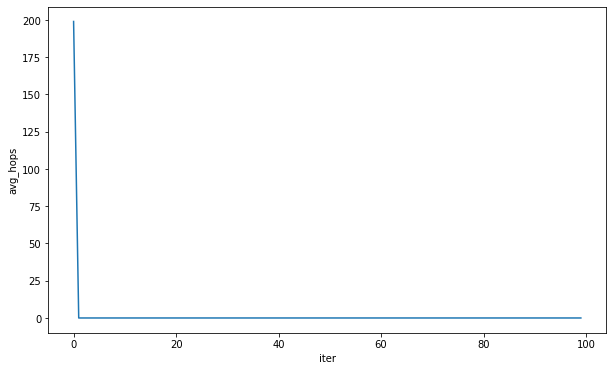

]n


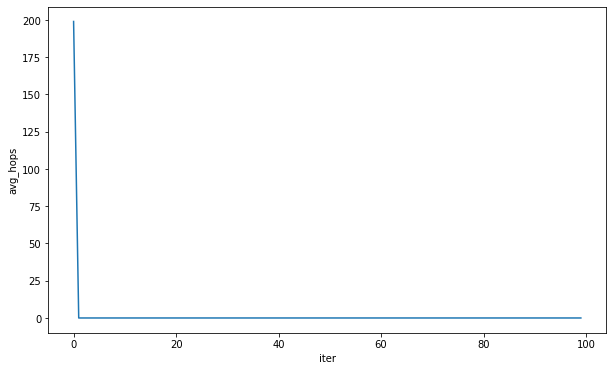

ow


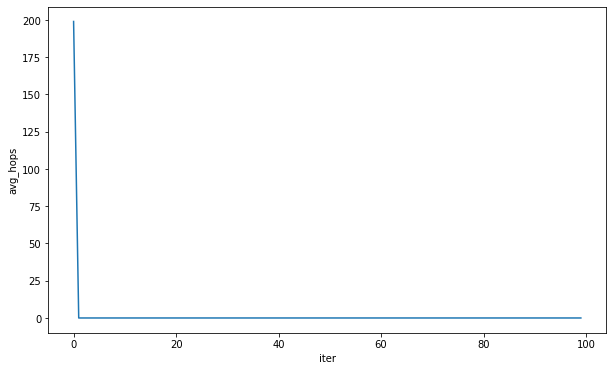

FK


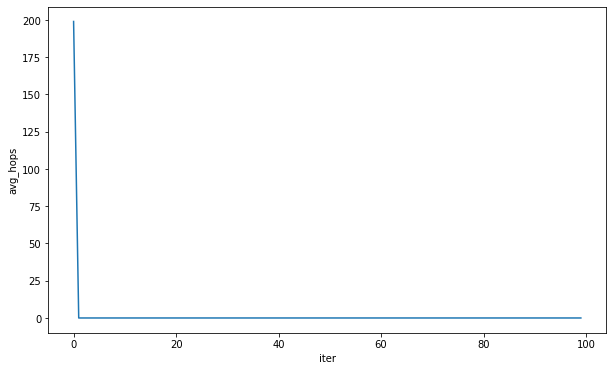

ou


In [ ]:
user_input5(200,30,0.5,3,100,100) ## memory(100) >> msgs(51)

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  52
Total iterations=  100
No of msgs=  53
2


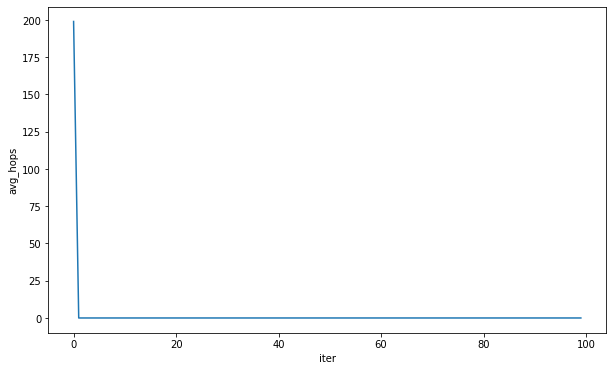

?Z


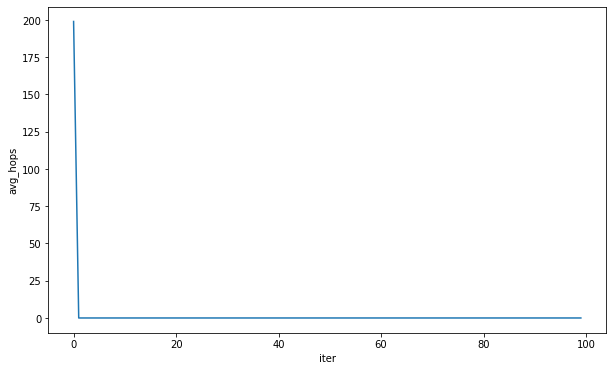

YX


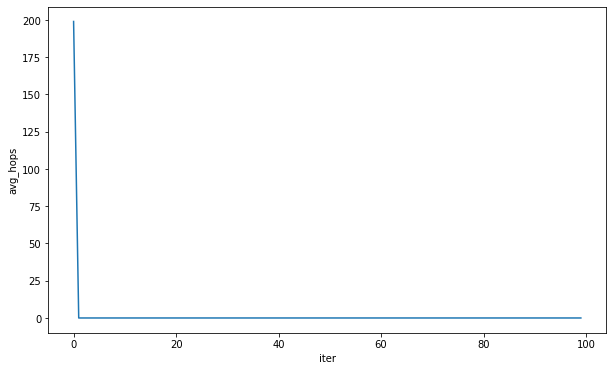

XX


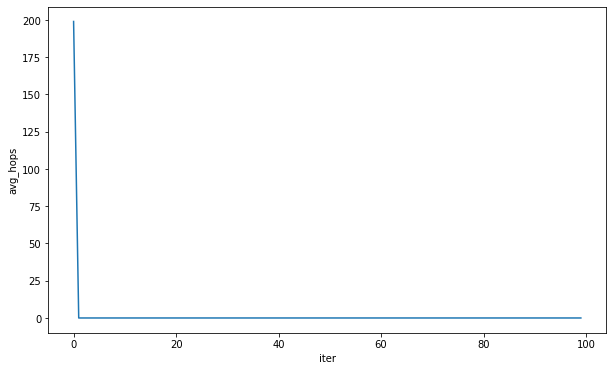

J_


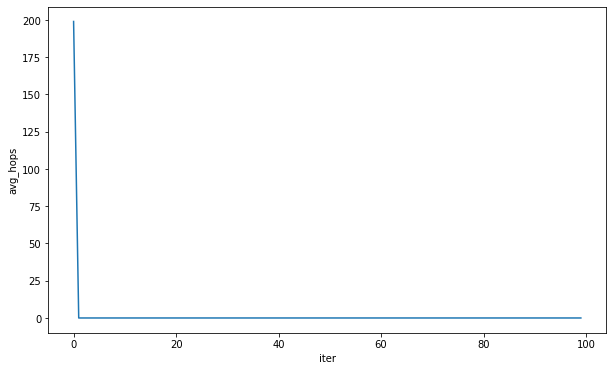

jK


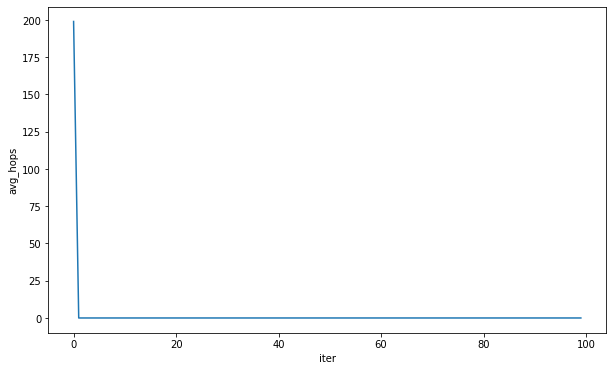

Bh


In [ ]:
user_input5(200,30,0.5,3,100,52) ## memory(52) <= msgs(53)

#BFS


#TOTAL HOPS VS ITERATION.

In [ ]:
def msg_Delivery_to_Adjacent_Nodes10(msg,population,k,dict,el,next):
  total=0
  for adj in population[el]['connected']:
    flag=0
    deliver=random.randint(0,1)
   # deliver=1
    if(deliver==1):
      if(msg in population[adj]['memory']):
        continue
      else:
        if(len(population[adj]['memory'])>=k):
          population[adj]['memory'].pop(0)
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          flag=1
          total+=1
        else:
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          flag=1
          total+=1
      if(flag==1):
        if(adj not in next):
          next.append(adj)
    else:
      continue
  
  return total


In [ ]:

def avgHopsCalc10(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes10(msg,population,k,dict,el,next) 
        #print(total)
    
    x.append(iteration)
    y.append(total) 
    #print(total)          

    iteration+=1
  plotXY(x,y,"Iterations","Total Hops") 
  print(total)
  return (total) 

def user_input10(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  avgHopsCalc10(population,mem,dict,iter)
#population

#OBSERVATIONS

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  20
Total iterations=  20
no of msgs 42


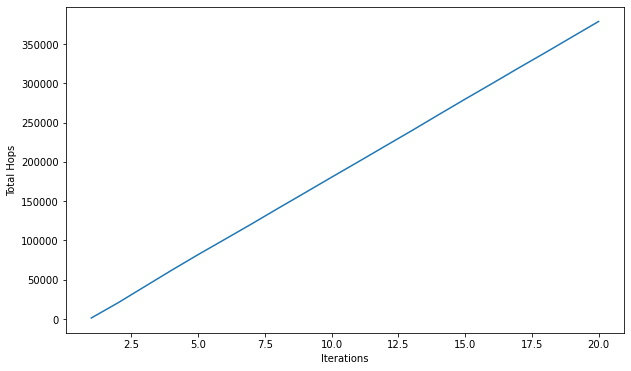

378649


In [ ]:
user_input10(200,20,0.5,3,20,20) ## memory(20) < msgs(42)

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  70
Total iterations=  20
no of msgs 44


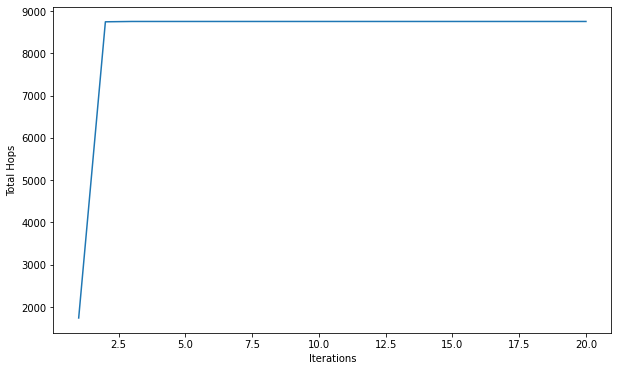

8756


In [ ]:
user_input10(200,20,0.5,3,20,70) ## memory(70)>msgs(44)

No of nodes=  200
Nearest neighbours=  6
Probability  0.5
Size of memory=  70
Total iterations=  20
no of msgs 50


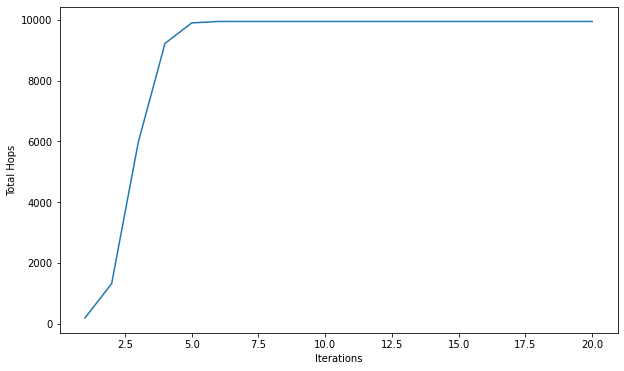

9946


In [ ]:
user_input10(200,6,0.5,3,20,70) ## memory(70)>msgs(50)  ##connected components reduced from 20 to 3

No of nodes=  200
Nearest neighbours=  6
Probability  0.5
Size of memory=  30
Total iterations=  20
no of msgs 44


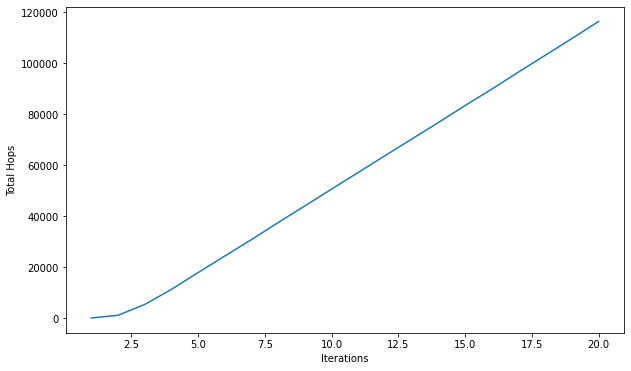

116361


In [ ]:
user_input10(200,6,0.5,3,20,30) ## memory reduced from the previous one

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  20
no of msgs 92


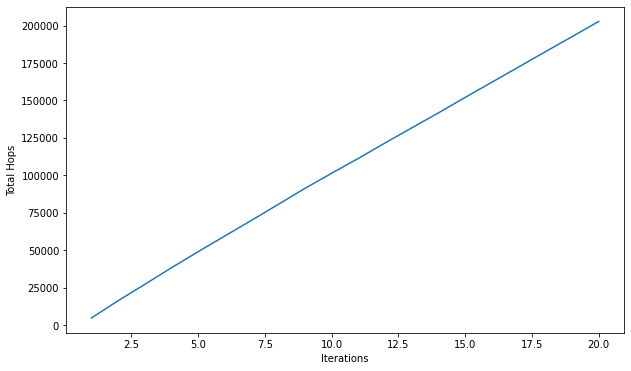

202714


In [ ]:
user_input10(200,20,0.5,1,20,10) ## memory(10)<<msgs(92)

#ITERATION VS AVERAGE HOPS(BFS) 

In [ ]:

def avgHopsCalc11(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes10(msg,population,k,dict,el,next) 
        #print(total)
    
    x.append(iteration)
    y.append(total)
    total=0 
    #print(total)          

    iteration+=1
  plotXY(x,y,"Iterations","Average Hops every iteration") 
  print(total)
  return (total) 

def user_input11(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  avgHopsCalc11(population,mem,dict,iter)
#population

#OBSERVATIONS

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  20
Total iterations=  20
no of msgs 43


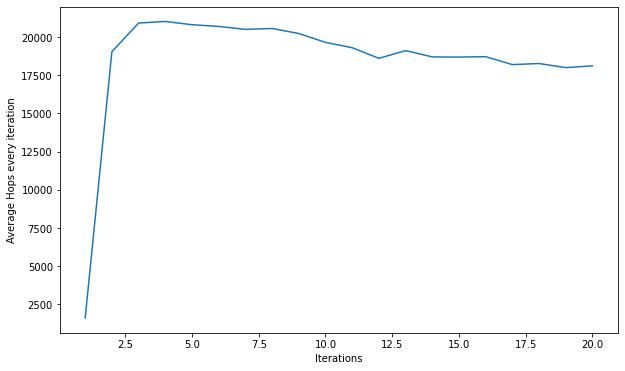

0


In [ ]:
user_input11(200,20,0.5,3,20,20) ## memory(20) < msgs(43)

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  20
no of msgs 47


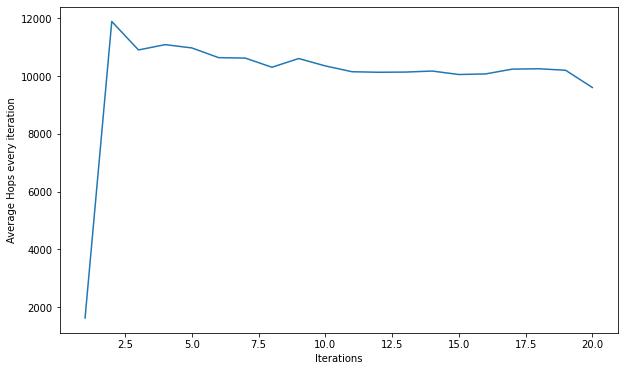

0


In [ ]:
user_input11(200,20,0.5,3,20,10) ## memory(10) < msgs(47) confusion--memory decreased but avg hops too decreased

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  200
no of msgs 52


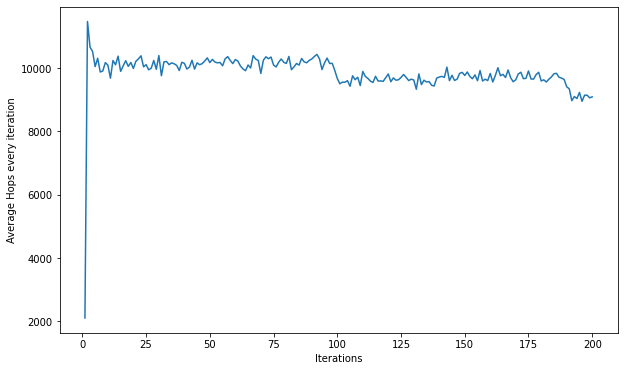

0


In [ ]:
user_input11(200,20,0.5,3,200,10) ## memory(10) < msgs(52)..Iterations increased to 200 

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  70
Total iterations=  20
no of msgs 57


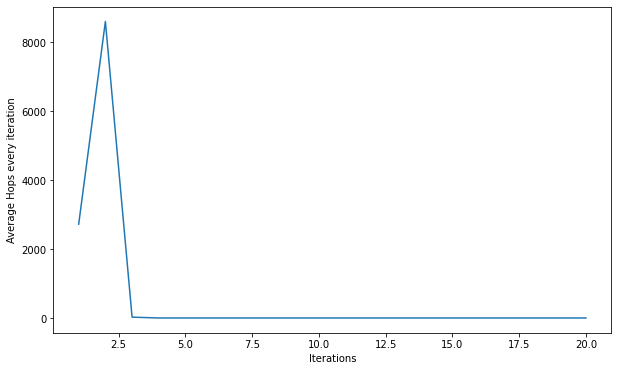

0


In [ ]:
user_input11(200,20,0.5,3,20,70) ## memory(70) > msgs(57)..Iterations increased to 200 

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  200
no of msgs 101


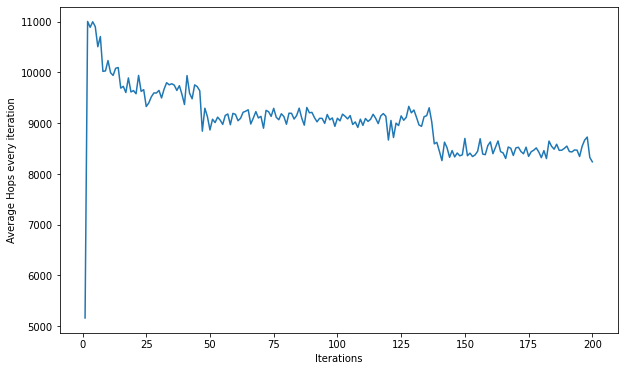

0


In [ ]:
user_input11(200,20,0.5,1,200,10) ## memory(10) << msgs(101)..

No of nodes=  500
Nearest neighbours=  20
Probability  0.5
Size of memory=  8
Total iterations=  200
no of msgs 266


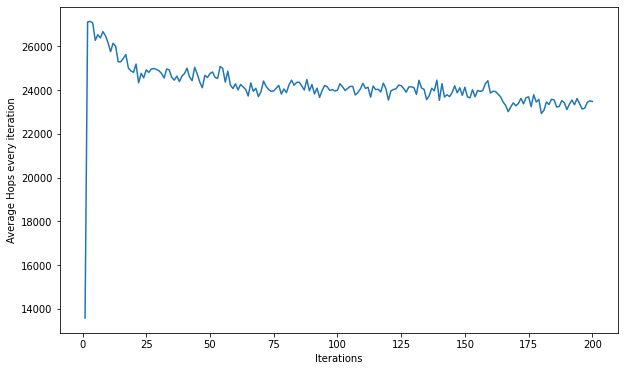

0


In [ ]:
user_input11(500,20,0.5,1,200,8) ## memory(8) << msgs(266)..

No of nodes=  500
Nearest neighbours=  20
Probability  0.5
Size of memory=  8
Total iterations=  1000
no of msgs 226


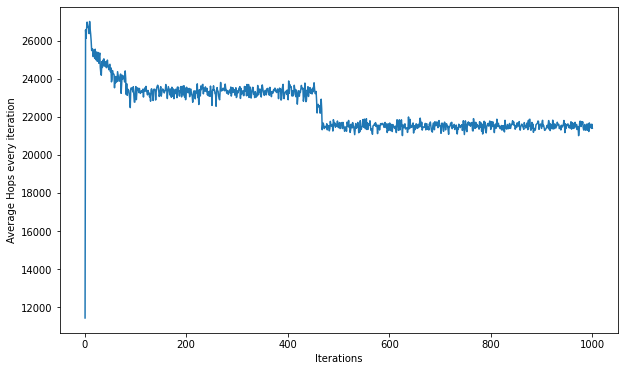

0


In [ ]:
user_input11(500,20,0.5,1,1000,8) ## memory(8) << msgs(266)..Iterations increased to 200 

#Memory given vs Total Hops(BFS)

In [ ]:

def avgHopsCalc12(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes10(msg,population,k,dict,el,next) 
        #print(total)
    
    #print(total)          

    iteration+=1
  #plotXY(x,y,"Iterations","Average Hops every iteration") 
 # print(total)
  return (total) 

def user_input12(no_nodes,no_of_connected_components,p,percent,iter):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  #print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  for j in range(1,g+10):
    for node in population:
      node['memory']=[]
    if(j==4 or j==g//2 or j==g ):
      print(j)
    x.append(j)
    total=avgHopsCalc12(population,j,dict,iter)
    
    y.append(total)
  plotXY(x,y,"Memory given","Total Hops")
#population

#Observations

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Total iterations=  20
no of msgs 29
4
14
29


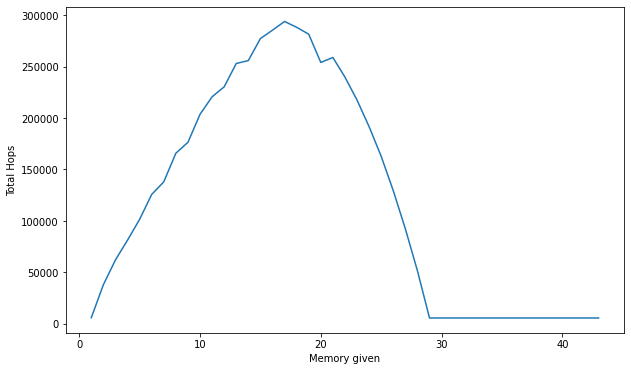

In [ ]:
user_input12(200,20,0.5,5,20) #msgs=48 p-length=0.5

No of nodes=  200
Nearest neighbours=  20
Probability  0.5
Total iterations=  20
no of msgs 48


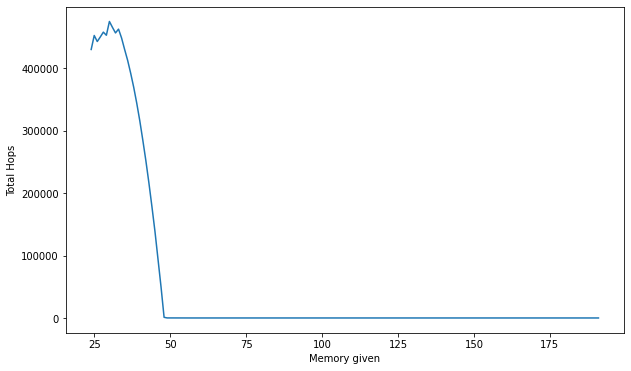

In [ ]:
user_input12(200,20,0.5,3,20) #msgs=48 p-length=0.5

No of nodes=  200
Nearest neighbours=  20
Probability  0.9
Total iterations=  20
no of msgs 48


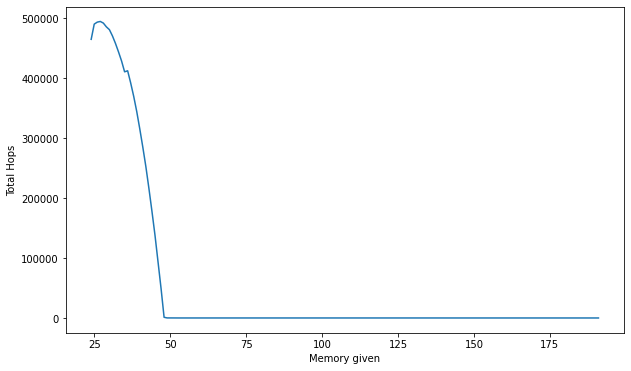

In [ ]:
user_input12(200,20,0.9,3,20) ## msgs(48) p_length=0.9

No of nodes=  200
Nearest neighbours=  20
Probability  0.9
Total iterations=  20
no of msgs 51
4


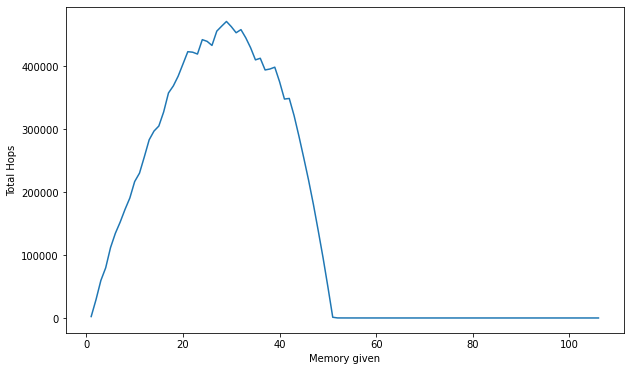

In [ ]:
user_input12(200,20,0.9,3,20) ## msgs(51).. memory starting from 1

No of nodes=  200
Nearest neighbours=  20
Probability  0.9
Total iterations=  100
no of msgs 29
4
14
29


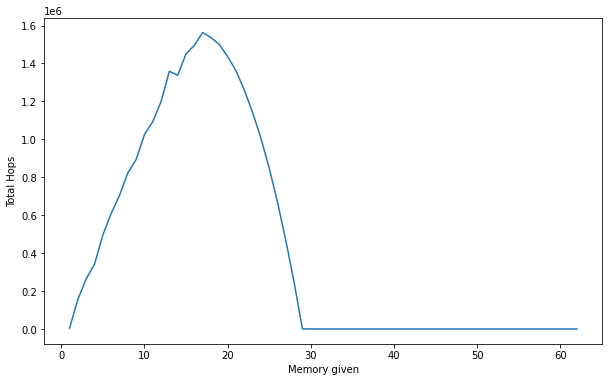

In [ ]:
user_input12(200,20,0.9,6,100) ## msgs(51).. memory starting from 1

No of nodes=  200
Nearest neighbours=  20
Probability  0.9
Total iterations=  20
no of msgs 92


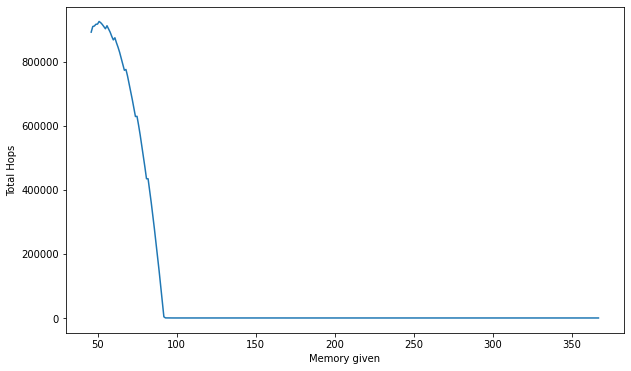

In [ ]:
user_input12(200,20,0.9,1,20) ## msgs(92) p_length=0.9

#ROUNDS VS AVG HOPS(BFS)

In [ ]:

def avgHopsCalc13(population,k,dict,iter):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  rounds=0
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    
    cur=next
    next=[]
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes10(msg,population,k,dict,el,next) 
        #print(total)
        rounds+=1
        if(rounds%1000==0):
          x.append(rounds)
          y.append(total)
      total=0 
    #print(total)          

    iteration+=1
  plotXY(x,y,"Rounds","Average Hops every rounds") 
  print(total)
  return (total) 

def user_input13(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  avgHopsCalc13(population,mem,dict,iter)
#population

#Observations

No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  30
Total iterations=  100
no of msgs 56


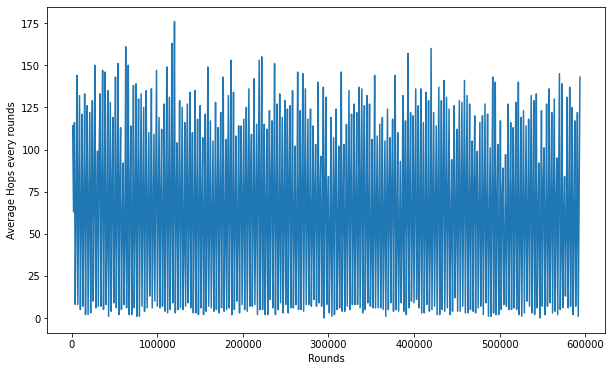

0


In [ ]:
user_input13(200,30,0.5,3,100,30) ## memory(30) < msgs(56) msgs(102)  rounds taken after every 1000 observations



No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  55
Total iterations=  10
no of msgs 54


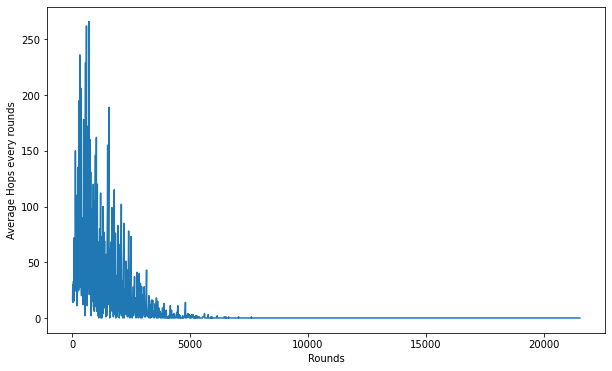

0


In [ ]:
user_input13(200,30,0.5,3,10,55) ## memory(55) > msgs(51)  rounds taken after every 10 observations


No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  60
Total iterations=  10
no of msgs 37


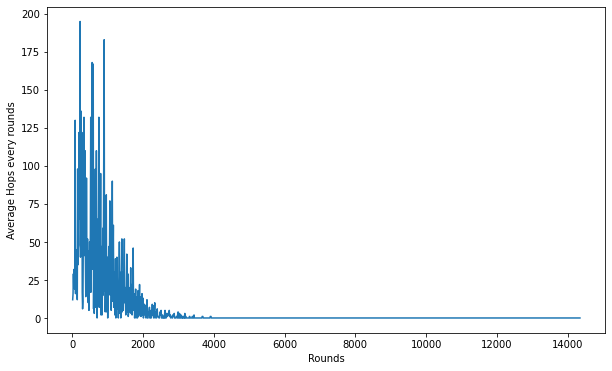

0


In [ ]:
user_input13(200,30,0.5,4,10,60) ## memory(60) > msgs(105)rounds taken after every 10 observations


No of nodes=  200
Nearest neighbours=  30
Probability  0.5
Size of memory=  20
Total iterations=  100
no of msgs 102


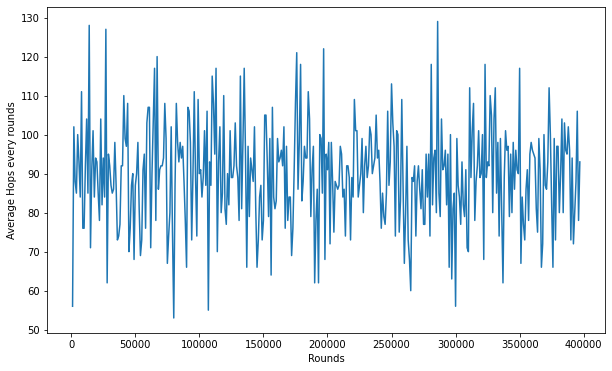

0


In [ ]:
user_input13(200,30,0.5,1,100,20) ## memory(20) << msgs(102)  rounds taken after every 1000 observations


No of nodes=  200
Nearest neighbours=  150
Probability  0.5
Size of memory=  30
Total iterations=  100
no of msgs 61


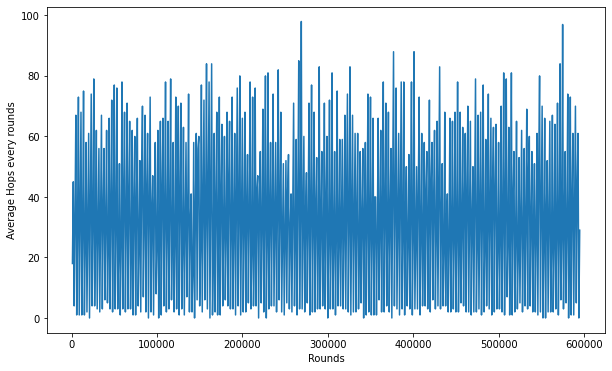

0


In [ ]:
user_input13(200,150,0.5,3,100,30) ## increased nearest neighbours to 150 from 30..Memor(30)<msgs(61)
##  rounds taken after every 1000 observations


No of nodes=  200
Nearest neighbours=  150
Probability  0.5
Size of memory=  70
Total iterations=  100
no of msgs 46


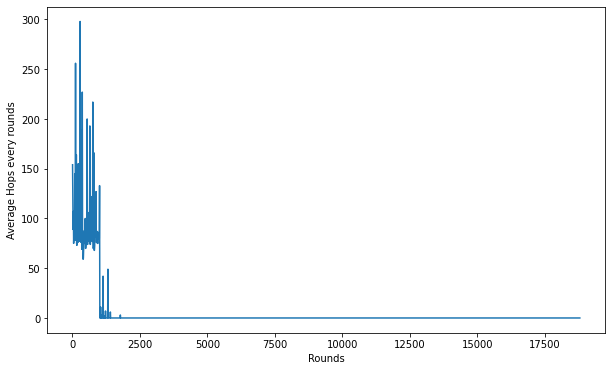

0


In [ ]:
user_input13(200,150,0.5,3,100,70) ## increased nearest neighbours to 150 from 30..Memor(70)>msgs(56)
##  rounds taken after every 10 observations


#Amnesiac with 1 msg.